# West Nile Virus US EDA

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [149]:
us_wnv_df = pd.read_csv('US_WNV_States_Complete.csv')
us_temp_df = pd.read_csv('US_Temperature_Data.csv')
us_prec_df = pd.read_csv('US_Percipitation_Data.csv')

## US WNV data description, datatypes, null counts, number of unique values

In [152]:
us_wnv_df = us_wnv_df[us_wnv_df['state'] != 'United States']
us_wnv_df.describe()

,wnnv_total_cases,wnnv_rate,year
count,561.000000,561.000000,561.0000
mean,24.315508,0.450588,2015.0000
std,62.775296,0.922193,3.1651
min,0.000000,0.000000,2010.0000
25%,2.000000,0.050000,2012.0000
50%,7.000000,0.160000,2015.0000
75%,23.000000,0.450000,2018.0000
max,844.000000,8.850000,2020.0000


In [154]:
us_wnv_df.dtypes

state                object
wnnv_total_cases      int64
wnnv_rate           float64
year                  int64
dtype: object

In [156]:
us_wnv_df.isnull().sum()

state               0
wnnv_total_cases    0
wnnv_rate           0
year                0
dtype: int64

In [158]:
us_wnv_df.nunique()

state                51
wnnv_total_cases     94
wnnv_rate           137
year                 11
dtype: int64

## US Temperature and Precipitation dataframe description, data types, null counts, number of unique values

In [170]:
print(us_temp_df.describe())
print(us_prec_df.describe())

              year        month  average_temperature_f  temperature_anomaly_f
count  6468.000000  6468.000000            6468.000000            6468.000000
mean   2015.000000     6.500000              52.700371               1.805813
std       3.162522     3.452319              18.011895               3.466627
min    2010.000000     1.000000             -12.800000             -16.200000
25%    2012.000000     3.750000              39.100000              -0.200000
50%    2015.000000     6.500000              54.000000               1.700000
75%    2018.000000     9.250000              67.600000               3.900000
max    2020.000000    12.000000              89.200000              17.300000
              year        month  precipitation_inches  \
count  6468.000000  6468.000000           6468.000000   
mean   2015.000000     6.500000              3.228932   
std       3.162522     3.452319              2.064494   
min    2010.000000     1.000000              0.010000   
25%    2012.0

In [172]:
print(us_temp_df.dtypes)
print(us_prec_df.dtypes)

year                       int64
month                      int64
average_temperature_f    float64
temperature_anomaly_f    float64
state                     object
dtype: object
year                              int64
month                             int64
precipitation_inches            float64
precipitation_anomaly_inches    float64
state                            object
dtype: object


In [174]:
print(us_temp_df.isnull().sum())
print(us_prec_df.isnull().sum())

year                     0
month                    0
average_temperature_f    0
temperature_anomaly_f    0
state                    0
dtype: int64
year                            0
month                           0
precipitation_inches            0
precipitation_anomaly_inches    0
state                           0
dtype: int64


In [176]:
print(us_temp_df.nunique())
print(us_prec_df.nunique())

year                      11
month                     12
average_temperature_f    783
temperature_anomaly_f    253
state                     49
dtype: int64
year                             11
month                            12
precipitation_inches            889
precipitation_anomaly_inches    818
state                            49
dtype: int64


In [178]:
# Rename columns
us_wnv_df.rename(columns={
    'wnnv_total_cases': 'wnv_count'
}, inplace=True)

## US West Nile Virus Cases Over TIme

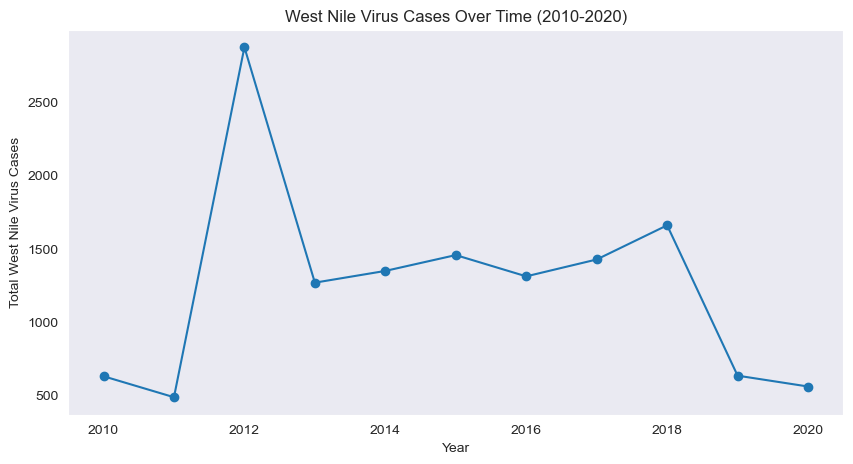

In [206]:
# group us data by year for year over year comparison
us_wnv_by_year = us_wnv_df.groupby("year")["wnv_count"].sum()

# plot for trend of wnv case counts from 2010-2020
plt.figure(figsize=(10,5))
plt.plot(us_wnv_by_year.index, us_wnv_by_year.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Total West Nile Virus Cases")
plt.title("West Nile Virus Cases Over Time (2010-2020)")
plt.grid()
plt.show()

## Top 10 States for Highest Total Case Numbers Between 2010-2020

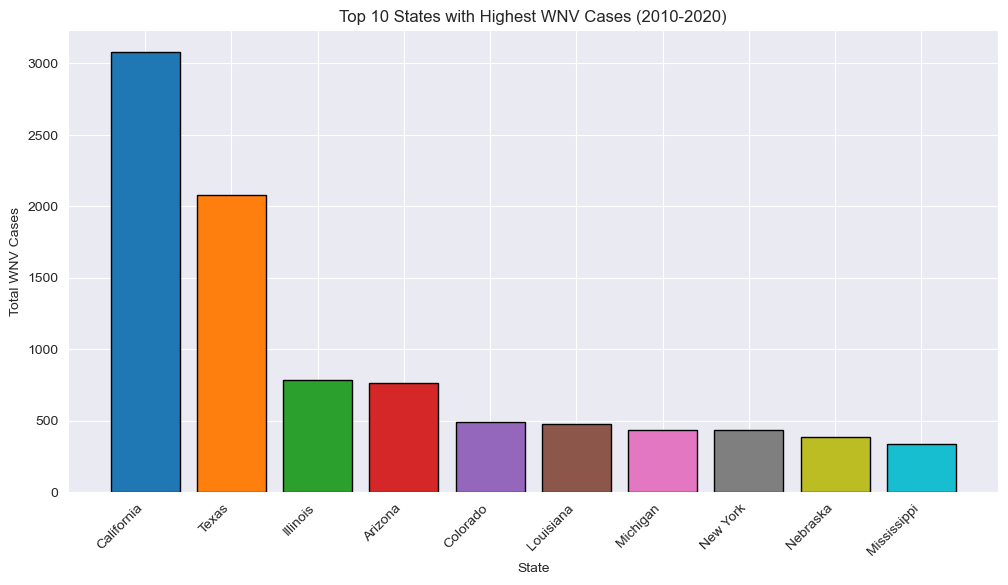

In [210]:
# setting seaborns style
sns.set_style("darkgrid")

# group cases by the top 10 states
top_states = us_wnv_df.groupby("state")["wnv_count"].sum().nlargest(10)

# Bar chart for state level comparison of wnv counts between 2010-2020
colors = sns.color_palette("tab10", len(top_states))
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
bars = plt.bar(top_states.index, top_states.values, color=colors, edgecolor="black")
plt.xlabel("State")
plt.ylabel("Total WNV Cases")
plt.title("Top 10 States with Highest WNV Cases (2010-2020)")
plt.xticks(rotation=45, ha="right")
plt.show()

## Heatmap Showing Where WNV has been Most Persistent in the US

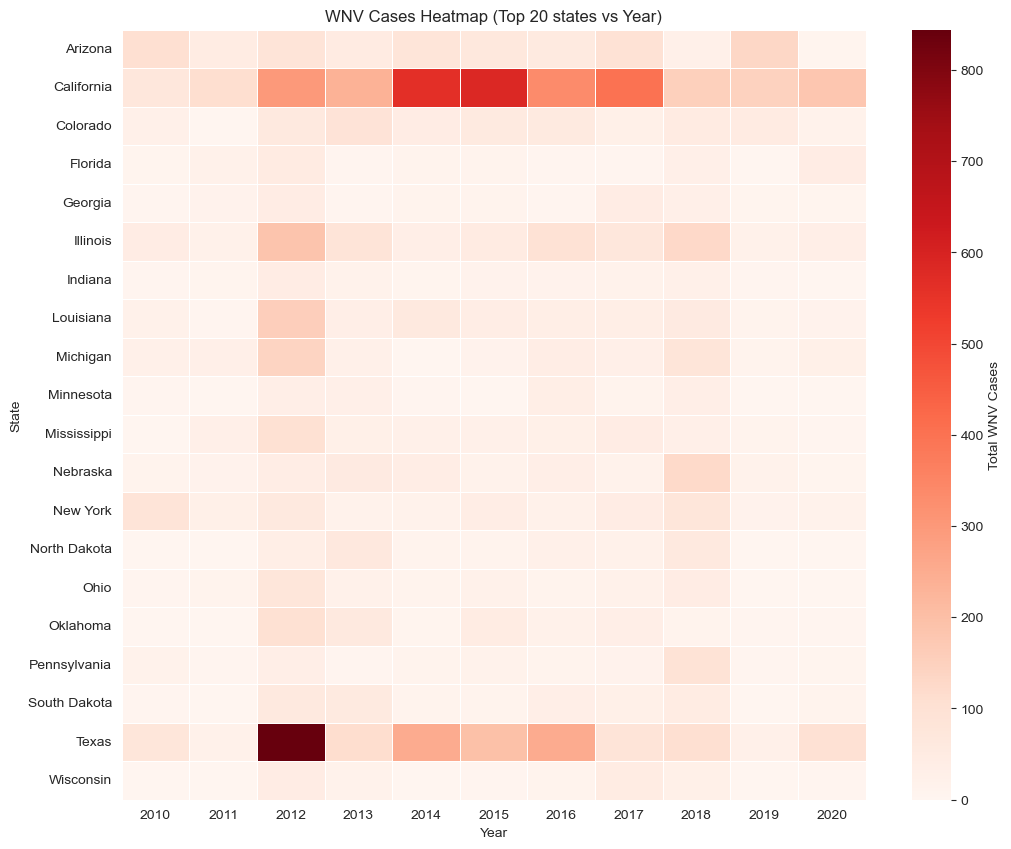

In [184]:
total_wnv_by_state = us_wnv_df.groupby('state')["wnv_count"].sum()

top_20_states = total_wnv_by_state.nlargest(20).index

top_20_us_wnv_df = us_wnv_df[us_wnv_df['state'].isin(top_20_states)]

us_heatmap_data = top_20_us_wnv_df.pivot_table(index="state", columns="year", values="wnv_count", aggfunc="sum")

# heatmap
plt.figure(figsize=(12,10))
sns.heatmap(us_heatmap_data, cmap="Reds", linewidths=0.5, cbar_kws={'label': 'Total WNV Cases'})
plt.title("WNV Cases Heatmap (Top 20 states vs Year)")
plt.xlabel("Year")
plt.ylabel("State")
plt.show()

In [188]:
# Aggregate temperature and precipitation data to yearly level
us_temp_aggregated = us_temp_df.groupby(['year', 'state']).agg(
    average_temperature_f=('average_temperature_f', 'mean'),
    temperature_anomaly_f=('temperature_anomaly_f', 'mean')
).reset_index()

us_prec_aggregated = us_prec_df.groupby(['year', 'state']).agg(
    precipitation_inches=('precipitation_inches', 'mean'),
    precipitation_anomaly_inches=('precipitation_anomaly_inches', 'mean')
).reset_index()

#m
merged_data = us_wnv_df.merge(us_temp_aggregated, on=['year', 'state'], how='inner')
merged_data = merged_data.merge(us_prec_aggregated, on=['year', 'state'], how='inner')

In [190]:
print(merged_data.isnull().sum())

state                           0
wnv_count                       0
wnnv_rate                       0
year                            0
average_temperature_f           0
temperature_anomaly_f           0
precipitation_inches            0
precipitation_anomaly_inches    0
dtype: int64


In [192]:
merged_data.head()

,state,wnv_count,wnnv_rate,year,average_temperature_f,temperature_anomaly_f,precipitation_inches,precipitation_anomaly_inches
0,Connecticut,7,0.20,2010,51.350000,3.308333,4.045000,0.139167
1,Maine,0,0.00,2010,44.633333,4.541667,4.109167,0.604167
2,Massachusetts,6,0.09,2010,50.350000,3.425000,4.135833,0.413333
3,New Hampshire,1,0.08,2010,45.983333,3.641667,4.166667,0.541667
4,Rhode Island,0,0.00,2010,51.966667,3.400000,4.443333,0.679167


In [194]:
# change temperature from F to C 
merged_data['average_temperature_c'] = (merged_data['average_temperature_f'] - 32) * 5/9
merged_data['temperature_anomaly_c'] = (merged_data['temperature_anomaly_f'] - 32) * 5/9

# drop columns using F
merged_data.drop(columns=['average_temperature_f', 'temperature_anomaly_f'], inplace=True)

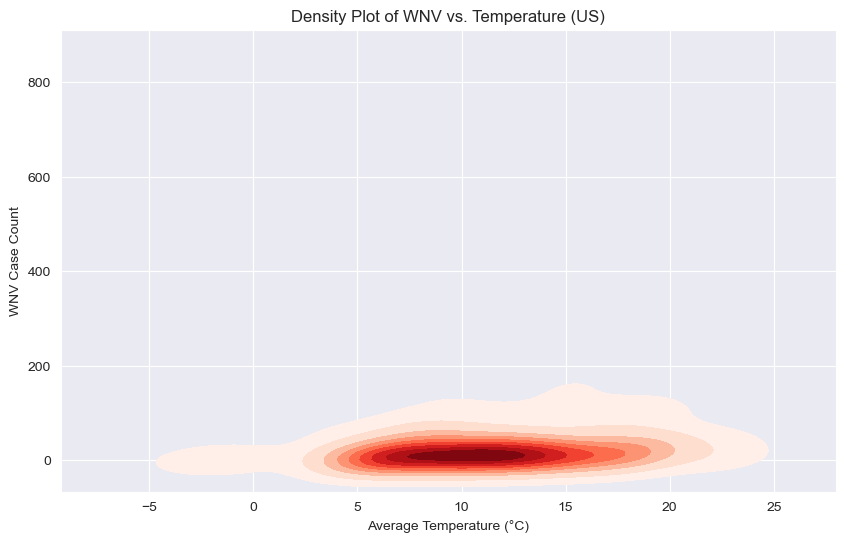

In [202]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=merged_data, x="average_temperature_c", y=merged_data["wnv_count"], cmap="Reds", fill=True)
plt.title("Density Plot of WNV vs. Temperature (US)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("WNV Case Count")
plt.show()

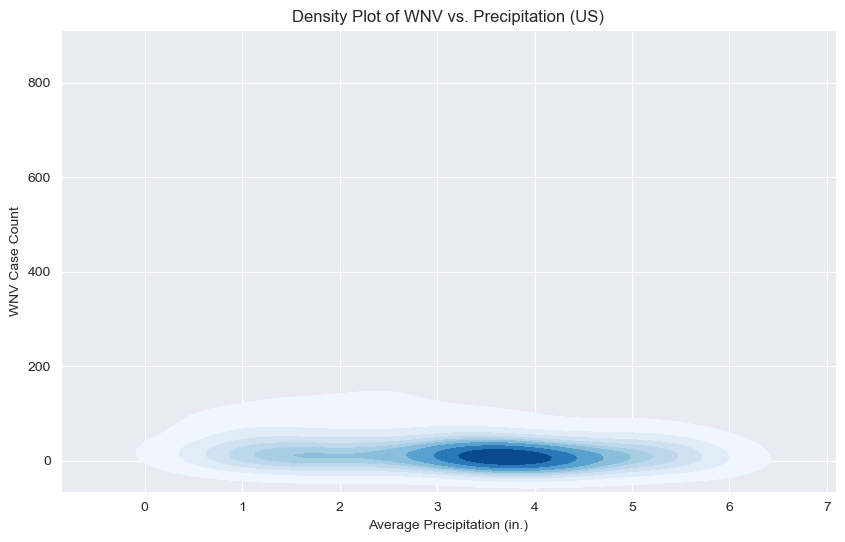

In [204]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=merged_data, x="precipitation_inches", y=merged_data["wnv_count"], cmap="Blues", fill=True)
plt.title("Density Plot of WNV vs. Precipitation (US)")
plt.xlabel("Average Precipitation (in.)")
plt.ylabel("WNV Case Count")
plt.show()